In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs 
import random 


/home/yassine/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# k-Means on a randomly generated dataset

In [2]:
np.random.seed(0)

Next we will be making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but we will be using these specific ones.

Input

    n_samples: The total number of points equally divided among clusters.
        Value will be: 5000
    centers: The number of centers to generate, or the fixed center locations.
        Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
    cluster_std: The standard deviation of the clusters.
        Value will be: 0.9


Output

    X: Array of shape [n_samples, n_features]. (Feature Matrix)
        The generated samples.
    y: Array of shape [n_samples]. (Response Vector)
        The integer labels for cluster membership of each sample.



In [3]:
X, y = make_blobs(n_samples = 5000, centers = [[4, 4], [-2, -1], [2, -3],[1,1]],cluster_std = 0.9 )

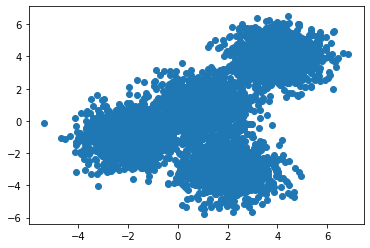

In [4]:
plt.scatter(X[:,0], X[:,1])

In [6]:
X.shape

(5000, 2)

In [71]:
y.shape

(5000,)

Now that we have our random data, let's set up our K-Means Clustering

In [7]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>

In [10]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Now let's grab the labels for each point in the model using KMeans' .labels_ attribute and save it as k_means_labels 

In [11]:
k_means_labels = k_means.labels_
k_means_labels

array([2, 0, 0, ..., 1, 2, 2], dtype=int32)

We will also get the coordinates of the cluster centers using KMeans' .cluster_centers_ and save it as k_means_cluster_centers


In [12]:
k_means_cluster_centers = k_means.cluster_centers_

In [13]:
k_means_cluster_centers

array([[ 2.0184578 , -2.94363073],
       [ 3.70310165,  3.69627302],
       [-0.80845164, -0.16933403]])

# Creating the Visual Plot

 So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

Please read through the code and comments to understand how to plot the model.


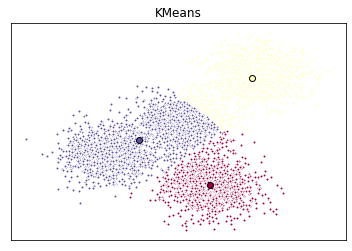

In [14]:
fig = plt.figure(figsize=(6,4))
colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))
ax = fig.add_subplot(1,1,1)
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()




In [15]:
import pandas as pd

In [16]:
data = pd.read_csv("Cust_Segmentation.csv")

In [17]:
data.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

In [18]:
cust_df = data.drop('Address', axis = 1)

In [19]:
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [20]:
cust_df.isnull()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
845,False,False,False,False,False,False,False,True,False
846,False,False,False,False,False,False,False,False,False
847,False,False,False,False,False,False,False,False,False
848,False,False,False,False,False,False,False,False,False


Normalizing over the standard deviation

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset

In [21]:
from sklearn.preprocessing import StandardScaler
x = cust_df.values[:,1:]
x = np.nan_to_num(x)
clus_dataset = StandardScaler().fit_transform(x)
clus_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [32]:
clusNum = 4
k_menass = KMeans(init = "k-means++", n_clusters = clusNum, n_init = 12)
k_menass.fit(x)
labels = k_menass.labels_

In [33]:
labels.shape

(850,)

In [34]:
cust_df['Clus_km'] = labels
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,3
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8,1
846,847,28,2,7,34,0.359,2.021,0.0,7.0,1
847,848,25,4,0,18,2.802,3.210,1.0,33.4,1
848,849,32,1,12,28,0.116,0.696,0.0,2.9,1


We can easily check the centroid values by averaging the features in each cluster.


In [35]:
cust_df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,411.262443,39.764706,1.805430,12.923077,62.814480,2.312855,4.445878,0.203297,10.691855
1,433.456172,32.050089,1.611807,5.445438,28.048301,0.930440,1.896669,0.296774,10.122898
2,453.500000,46.600000,2.300000,21.200000,270.900000,7.884000,13.375200,0.428571,8.210000
3,399.150000,43.416667,2.183333,19.483333,123.400000,3.836667,7.340467,0.108696,9.036667


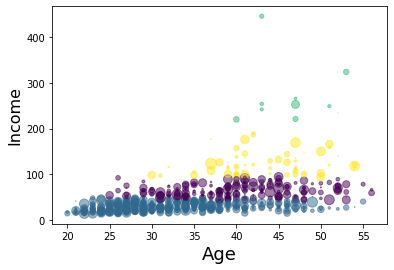

In [37]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(x[:, 0], x[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

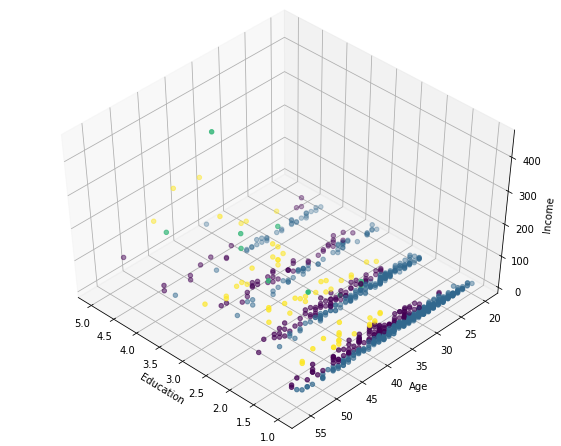

In [39]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(x[:, 1], x[:, 0], x[:, 3], c= labels.astype(np.float))